In [1]:
import pandas as pd
import sqlite3
import math

In [2]:
conn = sqlite3.connect('../data/resolver-probe-medians.db')
df_v4 = pd.read_sql('select * from heatmap_v4', con=conn).dropna(subset=['local'])
df_v6 = pd.read_sql('select * from heatmap_v6', con=conn).dropna(subset=['local'])
conn.close()

In [3]:
len(df_v4)

2049

In [4]:
len(df_v6)

797

In [5]:
for col in  ['CleanBrowsing',
             'Cloudflare',
             'Google',
             'Neustar',
             'OpenDNS',
             'OpenNIC',
             'Quad9',
             'VeriSign',
             'Yandex', 'NextDNS']:
    df_v4[col] = df_v4['local'] - df_v4[col]
    df_v6[col] = df_v6['local'] - df_v6[col]

In [6]:
df_v4.head()

,probe_id,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,continent,country,local,probe_count_continent
0,10001,-8.6120,-6.4940,-6.1990,NaN,-14.102,-6.2600,NaN,-6.5690,-8.3295,-35.6880,EU,NL,1.3100,1732
2,10015,-3.0370,-1.7690,-1.6225,NaN,-24.333,-1.8930,NaN,-3.0035,-3.1740,-28.6365,EU,NL,0.9520,1732
3,10022,16.2660,18.3570,15.3770,NaN,10.768,18.6015,NaN,18.5715,16.6800,-12.3430,EU,NL,24.5700,1732
4,10046,6.1825,3.3345,4.4015,NaN,-0.532,6.8705,NaN,-1.6640,5.3575,-24.3025,EU,NL,18.7135,1732
6,10099,-18.6850,-3.9080,-4.5650,NaN,-4.762,-3.6400,NaN,-4.2275,-30.6690,-132.3690,NA,US,0.9050,479


In [7]:
df_v4.count()

probe_id                 2049
CleanBrowsing            1995
Cloudflare               1981
Google                   1987
Neustar                    70
NextDNS                  1995
OpenDNS                  1996
OpenNIC                    68
Quad9                    1988
VeriSign                 1990
Yandex                   1979
continent                2049
country                  2049
local                    2049
probe_count_continent    2049
dtype: int64

In [8]:
df_v6.head()

,probe_id,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,continent,country,local,probe_count_continent
0,10001,0.5740,0.9730,-2.1620,NaN,-10.4270,1.2300,NaN,-6.2750,-0.5380,-29.4540,EU,NL,8.7370,1732
1,10015,1.4900,1.9795,-1.4615,NaN,-4.5655,1.9505,NaN,-5.9415,0.3720,-24.5885,EU,NL,4.6675,1732
3,10099,0.9400,0.9855,0.5025,NaN,-19.6055,-14.5465,NaN,0.9810,-61.9615,-119.7845,NA,US,5.3945,479
4,10134,7.8600,7.5455,1.8030,NaN,6.7210,7.6215,NaN,7.9540,1.9145,-25.2050,EU,GB,15.3090,1732
5,10141,-16.0825,-1.0735,-1.3460,NaN,-14.1640,-3.8935,NaN,-1.9435,-7.0980,-37.1795,EU,CH,8.6710,1732


In [9]:
df_v6.count()

probe_id                 797
CleanBrowsing            689
Cloudflare               689
Google                   685
Neustar                    2
NextDNS                  685
OpenDNS                  688
OpenNIC                    2
Quad9                    683
VeriSign                 691
Yandex                   682
continent                797
country                  797
local                    797
probe_count_continent    797
dtype: int64

In [10]:
from scipy import stats

In [11]:
pub_res = ['CleanBrowsing', 'Cloudflare', 'Google', 'Neustar', 'NextDNS', 
           'OpenDNS', 'OpenNIC', 'Quad9', 'VeriSign', 'Yandex']

In [12]:
for res in pub_res:
    print(res, stats.percentileofscore(df_v4[res], 0), stats.percentileofscore(df_v6[res], 0))

CleanBrowsing 59.39482674475354 61.73149309912171
Cloudflare 35.96876525134212 29.234629861982434
Google 53.733528550512446 46.42409033877039
Neustar 0.634455832113226 0.12547051442910917
NextDNS 51.68374816983894 51.568381430363864
OpenDNS 46.46168862859932 40.52697616060226
OpenNIC 0.634455832113226 0.12547051442910917
Quad9 54.66081015129331 49.43538268506901
VeriSign 67.98438262567106 59.34755332496863
Yandex 82.57686676427525 76.53701380175659


In [13]:
df_v4['mean'] = df_v4[['CleanBrowsing',
             'Cloudflare',
             'Google',
             'Neustar',
             'OpenDNS',
             'OpenNIC',
             'Quad9',
             'VeriSign',
             'Yandex', 'NextDNS']].mean(axis=1)

df_v6['mean'] = df_v6[['CleanBrowsing',
             'Cloudflare',
             'Google',
             'Neustar',
             'OpenDNS',
             'OpenNIC',
             'Quad9',
             'VeriSign',
             'Yandex', 'NextDNS']].mean(axis=1)

In [14]:
df_v4.describe()

,probe_id,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,local,probe_count_continent,mean
count,2049.000000,1995.000000,1981.000000,1987.000000,70.000000,1995.000000,1996.000000,68.000000,1988.000000,1990.000000,1979.000000,2049.000000,2049.000000,1999.000000
mean,32383.091752,1.058077,17.212554,10.947852,39.155929,10.973226,11.488910,39.917132,5.752079,-12.125136,-51.133858,37.111484,1321.581747,-0.342698
std,15231.790669,81.226659,77.273048,77.141813,83.287001,78.876309,77.678467,84.606171,79.300945,85.858039,100.491757,70.253187,642.020569,77.453679
min,10001.000000,-1199.226500,-1190.758000,-1204.173000,-32.851000,-1253.844000,-1196.129000,-33.329000,-1197.675000,-1231.845500,-1390.873000,0.412000,21.000000,-1230.503625
25%,19276.000000,-20.633500,-4.260500,-12.795500,0.323750,-11.625750,-11.106750,0.239375,-14.834500,-30.991750,-69.212500,4.495000,479.000000,-23.948750
50%,29702.000000,-5.611500,1.900000,-2.238000,14.707750,-0.539000,0.324000,13.351000,-2.510000,-10.816250,-37.706000,16.229000,1732.000000,-10.623250
75%,51078.000000,6.035500,15.005000,8.660500,50.816625,10.693000,11.047625,52.045250,8.624000,2.606625,-20.089250,34.857000,1732.000000,1.576844
max,55841.000000,782.977500,791.868500,773.063500,606.734500,782.987500,783.681500,606.741000,738.854500,782.090500,640.705500,794.445500,1732.000000,759.528625


In [15]:
df_v6.describe()

,probe_id,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,local,probe_count_continent,mean
count,797.000000,689.000000,689.000000,685.000000,2.000000,685.000000,688.000000,2.000000,683.000000,691.000000,682.000000,797.000000,797.000000,691.000000
mean,30923.742785,-26.111414,14.394689,8.616154,21.343250,3.059967,-4.428451,21.488250,5.246245,-6.391402,-45.965460,36.006560,1452.720201,-6.301413
std,14487.573955,79.404498,58.650261,57.941073,39.418021,64.127105,78.288913,39.176191,61.477851,65.322100,78.643199,89.818354,557.029724,59.289383
min,10001.000000,-223.572000,-212.082000,-218.678000,-6.529500,-284.059000,-213.680000,-6.213500,-212.222000,-216.938500,-386.740000,0.368000,21.000000,-243.680937
25%,18414.000000,-59.222500,-2.176000,-9.201000,7.406875,-11.764500,-10.512750,7.637375,-11.760000,-20.925250,-51.313750,7.035500,1732.000000,-25.522813
50%,29304.000000,-9.781500,2.218000,-0.817000,21.343250,-3.543500,0.509750,21.488250,-1.671000,-6.225000,-34.464750,16.334500,1732.000000,-11.408813
75%,35715.000000,0.940000,11.106000,6.222000,35.279625,7.117000,9.443875,35.339125,7.155000,3.113000,-23.970500,32.847000,1732.000000,-2.305656
max,55841.000000,1003.699500,1004.386500,995.496500,49.216000,1004.185500,1006.104000,49.190000,1004.503500,1002.003500,879.809000,1799.466000,1732.000000,987.523500


In [16]:
# non-EU and non-NA probes only
df_v4[~df_v4['continent'].isin(['EU', 'NA'])].describe()

,probe_id,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,local,probe_count_continent,mean
count,220.000000,216.000000,212.000000,215.000000,29.000000,216.000000,216.000000,29.000000,212.000000,211.000000,213.000000,220.000000,220.000000,218.000000
mean,32848.713636,-8.878972,18.865358,8.844960,37.092448,10.005132,5.479641,37.941207,-21.184566,-72.163374,-178.202239,63.183714,102.263636,-26.594756
std,15479.749992,155.350915,153.488795,152.527802,40.319245,159.801391,153.025727,41.276527,159.134951,160.809047,176.562325,102.692736,48.894571,151.958145
min,10266.000000,-1199.226500,-1190.758000,-1204.173000,-21.236500,-1253.844000,-1196.129000,-17.435000,-1197.675000,-1231.845500,-1390.873000,0.533000,21.000000,-1230.503625
25%,19501.250000,-46.031875,-0.653000,-18.302250,2.140000,-6.057750,-25.822500,1.836000,-68.849000,-136.819000,-260.298000,9.444000,45.000000,-66.239413
50%,30234.000000,0.088000,4.017500,1.779500,24.453500,3.079500,0.822000,31.298000,0.171500,-94.691000,-210.032500,25.526750,111.500000,-41.314906
75%,50699.000000,12.788000,24.508750,17.111000,77.456500,20.399500,15.932500,77.630500,13.345500,-1.002500,-86.535000,56.568250,149.000000,-3.039794
max,55737.000000,558.957000,583.859500,595.022000,115.870000,586.285500,592.649000,120.799500,559.854000,465.519000,433.444500,620.439000,149.000000,514.971563


In [17]:
df_v6[~df_v6['continent'].isin(['EU', 'NA'])].describe()

,probe_id,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,local,probe_count_continent,mean
count,47.000000,36.000000,37.000000,36.000000,1.0000,36.000000,36.000000,1.0000,36.000000,37.000000,36.000000,47.000000,47.000000,37.000000
mean,30956.042553,-42.424306,13.722973,10.129500,-6.5295,-61.093972,2.161181,-6.2135,-42.773444,-82.688784,-222.098847,44.921989,88.638298,-51.797995
std,15206.286412,110.094557,84.194146,88.986400,NaN,129.121502,96.459444,NaN,91.459949,91.875048,92.439286,73.323202,45.996420,84.644124
min,10933.000000,-223.572000,-212.082000,-218.678000,-6.5295,-284.059000,-212.920500,-6.2135,-212.222000,-216.938500,-386.740000,0.615000,21.000000,-243.680937
25%,17397.000000,-125.073125,-6.446500,-12.758625,-6.5295,-155.699375,-35.645875,-6.2135,-121.382625,-132.891500,-277.069875,5.439000,45.000000,-96.407125
50%,26736.000000,-12.101000,1.669000,-0.380500,-6.5295,-19.694000,-0.313500,-6.2135,-21.991000,-114.352500,-240.744500,11.516000,74.000000,-56.921375
75%,50313.000000,1.398625,10.377000,3.528875,-6.5295,-5.496250,7.530250,-6.2135,3.057500,-21.613000,-187.004000,45.314500,149.000000,-38.206062
max,55363.000000,317.992000,318.085500,317.975000,-6.5295,305.267000,318.351000,-6.2135,219.329000,204.836000,33.543000,323.272000,149.000000,236.599125


In [18]:
import Cdf
v4_cdfs = dict()
v6_cdfs = dict()

In [19]:
v4_samples = dict()
v6_samples = dict()

In [20]:
for col in  ['CleanBrowsing',
             'Cloudflare',
             'Google',
             'Neustar',
             'OpenDNS',
             'OpenNIC',
             'Quad9',
             'VeriSign',
             'Yandex', 'NextDNS']:

    tmp_v4 = df_v4[col].dropna()
    tmp_v6 = df_v6[col].dropna()

    v4_samples[col] = len(tmp_v4)
    v6_samples[col] = len(tmp_v6)

    v4_cdfs[col] = Cdf.MakeCdfFromList(tmp_v4)
    v6_cdfs[col] = Cdf.MakeCdfFromList(tmp_v6)



In [21]:
v4_samples

{'CleanBrowsing': 1995,
 'Cloudflare': 1981,
 'Google': 1987,
 'Neustar': 70,
 'NextDNS': 1995,
 'OpenDNS': 1996,
 'OpenNIC': 68,
 'Quad9': 1988,
 'VeriSign': 1990,
 'Yandex': 1979}

In [22]:
v6_samples

{'CleanBrowsing': 689,
 'Cloudflare': 689,
 'Google': 685,
 'Neustar': 2,
 'NextDNS': 685,
 'OpenDNS': 688,
 'OpenNIC': 2,
 'Quad9': 683,
 'VeriSign': 691,
 'Yandex': 682}

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
colors = {'CleanBrowsing': 'C0',
          'Cloudflare': 'C1',
          'Google': 'C2',
          'Neustar': 'C3',
          'OpenDNS': 'C4',
          'OpenNIC': 'C5',
          'Quad9': 'C6',
          'VeriSign': 'C7',
          'Yandex': 'C8',
          'local': 'C9',
          'NextDNS': '#009E73'
         }

markers = {'CleanBrowsing': 'o',
          'Cloudflare': 'v',
          'Google': '^',
          'Neustar': '<',
          'OpenDNS': '>',
          'OpenNIC': 's',
          'Quad9': 'p',
          'VeriSign': 'h',
          'Yandex': 'd',
          'local': '*',
           'NextDNS': '.'
         }

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


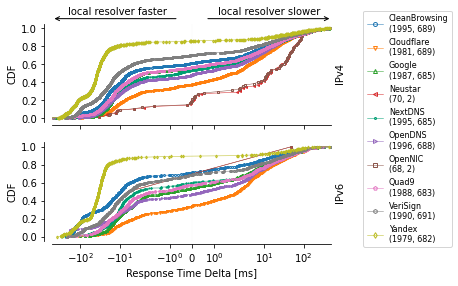

In [25]:
fig, (ax_v4, ax_v6) = plt.subplots(figsize=(5,4), nrows=2)

for (delta_cdfs, ax, smples) in [(v4_cdfs, ax_v4, v4_samples), (v6_cdfs, ax_v6, v6_samples)]:
    
    for k in sorted(delta_cdfs.keys()):
        
        ax.plot(delta_cdfs[k].xs, delta_cdfs[k].ps,
                label=k + '\n(' + str(v4_samples[k]) + ', ' + str(v6_samples[k]) +  ')', color=colors[k],
                marker=markers[k], markersize=2,  # markevery=max(1, len(delta_cdfs[k].xs)/50),
                linewidth=0.5, fillstyle='none')

    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_xscale('symlog')
    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.03))
    ax.spines['left'].set_position(('axes', -0.03))

    ax.axvline(x=0, color='black', linestyle='--', linewidth=0.2, alpha=0.1)

    ax.set_xlim([-500, 500])
        
ax_v4.annotate('', xy = (0.45, 1.05),
            xycoords = 'axes fraction',
            xytext = (0.0, 1.05),
            arrowprops = dict(arrowstyle = '<-'))
ax_v4.annotate('', xy = (1.0, 1.05),
            xycoords = 'axes fraction',
            xytext = (0.55, 1.05),
            arrowprops = dict(arrowstyle = '->'))
ax_v4.text(-200, 1.15, 'local resolver faster')
ax_v4.text(1.2, 1.15, 'local resolver slower')
        
ax_v4.set_xlabel('')
ax_v6.set_xlabel('Response Time Delta [ms]')

ax_v4.set_title('')
ax1_ = ax_v4.twinx()
ax1_.spines['right'].set_color('none')
ax1_.spines['top'].set_color('none')
ax1_.spines['left'].set_color('none')
ax1_.spines['bottom'].set_color('none')
ax1_.yaxis.set_ticks_position('none')
ax1_.set_ylabel('IPv4')
plt.setp(ax1_.get_yticklabels(), visible = False)

ax_v6.set_title('')
ax2_ = ax_v6.twinx()
ax2_.spines['right'].set_color('none')
ax2_.spines['top'].set_color('none')
ax2_.spines['left'].set_color('none')
ax2_.spines['bottom'].set_color('none')
ax2_.yaxis.set_ticks_position('none')
ax2_.set_ylabel('IPv6')
plt.setp(ax2_.get_yticklabels(), visible = False)

ax_v4.set_ylabel('CDF')
ax_v6.set_ylabel('CDF')

plt.setp(ax_v4.get_xticklabels(), visible = False)

# ax_v4.legend(loc = 'lower left', markerscale = 2, fontsize = 10, ncol=2, bbox_to_anchor=(-0.15,1.2))
ax_v4.legend(loc = 'lower left', markerscale = 2, fontsize = 8, ncol=1, bbox_to_anchor=(1.1,-1.3))

fig.savefig('../plots/local-res-deltas.pdf', bbox_inches='tight')
fig.savefig('../plots/local-res-deltas.eps', bbox_inches='tight')

In [26]:
for k in sorted(v4_cdfs.keys()):
    print(k)
    for x, p in list(zip(v4_cdfs[k].xs, v4_cdfs[k].ps))[::(max(1, math.ceil(len(v4_cdfs[k].xs)/100)))]:
        print(x,p)
    print('\n============================\n')

CleanBrowsing
-1199.2265 0.0005012531328320802
-132.55300000000003 0.010526315789473684
-115.339 0.02055137844611529
-105.8245 0.030576441102756893
-101.90050000000001 0.04110275689223058
-95.124 0.05112781954887218
-83.4905 0.061152882205513785
-60.529 0.07117794486215538
-52.437999999999995 0.081203007518797
-46.81850000000001 0.0912280701754386
-42.94349999999999 0.1012531328320802
-38.099 0.11127819548872181
-34.8915 0.12130325814536341
-32.930499999999995 0.13132832080200502
-32.031 0.14135338345864662
-30.238500000000002 0.15137844611528822
-28.6075 0.16140350877192983
-27.359 0.17142857142857143
-25.979 0.18145363408521303
-24.884 0.19147869674185464
-24.044 0.20150375939849624
-23.263000000000005 0.21152882205513784
-22.4965 0.22155388471177945
-21.706999999999997 0.23157894736842105
-21.103 0.24160401002506265
-20.540499999999998 0.25162907268170426
-19.7865 0.26165413533834586
-19.1325 0.27167919799498746
-18.519 0.28170426065162907
-17.680999999999997 0.29172932330827067
-16

In [27]:
for k in sorted(v6_cdfs.keys()):
    print(k)
    for x, p in list(zip(v6_cdfs[k].xs, v6_cdfs[k].ps))[::(max(1, math.ceil(len(v6_cdfs[k].xs)/100)))]:
        print(x,p)
    print('\n============================\n')

CleanBrowsing
-223.572 0.001451378809869376
-176.9615 0.013062409288824383
-165.131 0.023222060957910014
-158.174 0.033381712626995644
-154.32399999999998 0.04354136429608128
-148.63 0.05370101596516691
-146.648 0.06386066763425254
-140.97299999999998 0.07402031930333818
-138.4555 0.0841799709724238
-135.728 0.09433962264150944
-133.20749999999998 0.10449927431059507
-126.43949999999998 0.11465892597968069
-123.275 0.12481857764876633
-115.48300000000003 0.13497822931785197
-105.951 0.14513788098693758
-99.07300000000001 0.15529753265602322
-95.69500000000001 0.16545718432510886
-94.50699999999999 0.17561683599419448
-92.72449999999999 0.18577648766328012
-90.73350000000002 0.19593613933236576
-88.381 0.20609579100145137
-86.6735 0.216255442670537
-81.14699999999999 0.22641509433962265
-71.8715 0.2365747460087083
-63.4875 0.2467343976777939
-57.6 0.25689404934687954
-53.428 0.26705370101596515
-42.787499999999994 0.2772133526850508
-37.301000000000016 0.28737300435413643
-31.8185 0.297